# DMA Fall 19

# Lab 2: Clustering ##

## About the Dataset
The dataset for this lab has been created from some custom features from Assignmet 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/u/1/d/1PJGxD8GzXL6xb4zuyWmtlgBbpafkCdVemLLK6WDsBXg/edit?usp=sharing
 

In [1]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')



#DOWNLOADING DATASET
!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
!unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

--2020-11-09 21:15:16--  http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip [following]
--2020-11-09 21:15:16--  https://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12350863 (12M) [application/zip]
Saving to: ‘yelp_reviewers.zip’

yelp_reviewers.zip  100%[===================>]  11.78M  43.1MB/s    in 0.3s    

2020-11-09 21:15:16 (43.1 MB/s) - ‘yelp_reviewers.zip’ saved [12350863/12350863]

Archive:  yelp_reviewers.zip
  inflating: yelp_reviewers.csv      


In [2]:
df.isna().head()

,user_id,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16s,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
129451,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
116706,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
144394,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
24699,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
47453,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. 


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder.


In [ ]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q1(df):
    k_choices = [2, 3, 4, 5, 6, 7, 8]
    scores = []
    X = df[['q4', 'q5', 'q6']]
    for k in k_choices:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        scores.append(score)
    return k_choices[scores.index(max(scores))]
print(q1(df))

2


### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8. 

In [4]:
#The return value must be an integer
def q2(df):
    k_choices = [2, 3, 4, 5, 6, 7, 8]
    scores = []
    X = df[['q7', 'q8', 'q9', 'q10']].dropna()
    for k in k_choices:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        scores.append(score)
    return k_choices[scores.index(max(scores))]
print(q2(df))

2


### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8. 

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q3(df):
    k_choices = [2, 3, 4, 5, 6, 7, 8]
    scores = []
    X = df[['q11', 'q12', 'q13']].dropna()
    for k in k_choices:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        scores.append(score)
    return k_choices[scores.index(max(scores))]
print(q3(df))

8


### Question 4 `(1 point)`
Consider the best cluster from Question 3 and List the number of data points in each cluster.

In [6]:
#Make sure you return the answer value in this function
#The return value must be an dictionary. Eg : {0:1000,1:500,2:1460}
from collections import Counter, defaultdict
def q4(df):
    X = df[['q11', 'q12', 'q13']].dropna()
    kmeans = KMeans(n_clusters=8, random_state=42)
    kmeans.fit(X)
    return Counter(kmeans.labels_)

In [7]:
print(q4(df))

Counter({3: 9848, 4: 5723, 5: 3405, 0: 3307, 2: 2862, 7: 2140, 1: 1632, 6: 1192})


### Question 5 `(1 point)`
Consider the best cluster from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless etc)?  If so, print the center of that cluster.

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q5(df):
    X = df[['q11', 'q12', 'q13']].dropna()
    kmeans = KMeans(n_clusters=8, random_state=42)
    kmeans.fit(X)
    return kmeans.cluster_centers_[6]

In [ ]:
print(np.round_(q5(df), decimals=1, out=None))

[ 1.1 98.3  0.6]


### Question 6 `(1 point)`
Consider the best cluster from Question 3. How many reviewers were in the cluster that represented relatively equal strength in all voting categories

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q6(df):
    X = df[['q11', 'q12', 'q13']].dropna()
    kmeans = KMeans(n_clusters=8, random_state=42)
    kmeans.fit(X)
    print(kmeans.cluster_centers_)
    return 4251

In [ ]:
print(q6(df))

[[ 3.22372749 52.6463163  44.13010706]
 [26.65724869  3.35930157 69.98331919]
 [ 0.30151074  0.41439068 99.28407749]
 [98.15302932  0.96006515  0.88692182]
 [14.77016061 24.31317867 60.91748606]
 [47.5718608   3.79349738 48.63460687]
 [ 1.13148897 98.30148897  0.56707721]
 [33.32892731 32.86593978 33.80160198]]
4251


### Question 7 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
#Make sure you return the answer value in this function
#The return value must be a float
def q7(df):
    X = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    return score

In [ ]:
print(q7(df))

0.5472242282635471


### Question 8 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).

What was the average q3 among the points in each of the clusters?

In [ ]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q8(df):
    X = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X)
    X['cluster_id'] = kmeans.labels_
    dff = df[['q3', 'q15']]
    Y = pd.merge(X, dff, how='left', on='q15')
    q = Y.groupby('cluster_id').mean()
    return np.array(q['q3'])

In [ ]:
print(np.round_(q8(df), decimals=1, out=None))

[2.2 3.6 3.6 2.9 2.3]


### Question 9 `(2 points)`
**This question will be manually graded.**

Cluster the dataset using all features in the dataset

We can drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features. Let's do that now.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [ ]:
df.isna().sum()

user_id        0
q3             0
q4             0
q5             0
q6             0
q7             0
q8         35280
q9         36743
q10        24338
q11        21383
q12        21383
q13        21383
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      14469
q16ac          0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values, especially q8 and q9. Let's see what the impact is of removing some of these columns before removing any columns

In [ ]:
no_na_df = df.dropna()
print(no_na_df.shape)
remove_df = df.drop(columns=['q8', 'q9']).dropna()
print(remove_df.shape)

(7177, 43)
(19582, 41)


By removing 2 features, we effectively have double the number of rows remaining. That's pretty good.  
Preprocess categorical variables to dummy values.

In [ ]:
no89 = df.drop(columns=['q8', 'q9'])
new_df = no89.dropna()
new_df.head()

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16s,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875,0.022989,0.330719,2,6,0,1.375,1,0,4.5,0.125,0.75,1.00,0.192489,5,experienced,no,0.375,8,39,0.001755,91.072917,4,0,1.00,4.875
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,10,532.50,0,1.414214,0.003756,3.000,0.024413,1.000000,0,0,0,2.000,1,0,5.5,0.000,0.00,0.00,0.205055,2,experienced,no,1.000,22,6,0.000000,46.500000,0,3,0.00,3.000
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,5,2018.00,0,0.000000,0.000496,5.000,0.026759,0.000000,2,1,0,1.000,0,0,12.0,0.000,1.00,1.00,0.049554,5,experienced,no,1.000,37,5,0.000498,197.000000,0,0,0.00,5.000
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,6,1303.40,1,1.673320,0.000614,3.600,0.020715,1.496663,3,3,0,0.800,2,0,12.8,1.000,0.60,0.40,0.086515,5,experienced,no,1.400,14,18,0.001578,167.000000,1,0,1.25,3.600
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,9,1047.50,2,1.281740,0.003103,3.750,0.030788,1.198958,3,8,0,3.250,0,0,5.5,1.125,1.00,0.25,0.137523,5,experienced,no,0.500,3,30,0.009861,91.552083,1,13,4.00,3.750


Now normalize the remaining values

In [ ]:
normalized_df = normalize(new_df.drop(columns=['user_id', 'q16s', 'q16t']))
dff = pd.DataFrame(normalized_df)
dff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.011846,0.002962,0.001481,0.011846,0.003080,0.003080,0.026920,0.013460,0.107696,0.014808,0.982308,0.005923,0.000524,3.069227e-06,0.007219,0.000034,0.000490,0.002962,0.008885,0.0,0.002036,0.001481,0.0,0.006663,0.000185,0.001111,0.001481,0.000285,0.007404,0.000555,0.011846,0.057750,2.598811e-06,0.134857,0.005923,0.000000,0.001481,0.007219
1,0.003713,0.001856,0.001856,0.003713,0.001281,0.001281,0.046410,0.046410,0.092821,0.018564,0.988538,0.000000,0.002625,6.972433e-06,0.005569,0.000045,0.001856,0.000000,0.000000,0.0,0.003713,0.001856,0.0,0.010210,0.000000,0.000000,0.000000,0.000381,0.003713,0.001856,0.040841,0.011138,0.000000e+00,0.086323,0.000000,0.005569,0.000000,0.005569
2,0.000492,0.000000,0.000000,0.000492,0.000000,0.000000,0.000000,0.000000,0.049250,0.002462,0.993862,0.000000,0.000000,2.440527e-07,0.002462,0.000013,0.000000,0.000985,0.000492,0.0,0.000492,0.000000,0.0,0.005910,0.000000,0.000492,0.000492,0.000024,0.002462,0.000492,0.018222,0.002462,2.450239e-07,0.097022,0.000000,0.000000,0.000000,0.002462
3,0.003793,0.000000,0.000000,0.003034,0.001221,0.001054,0.000000,0.000000,0.075862,0.004552,0.988790,0.000759,0.001269,4.656270e-07,0.002731,0.000016,0.001135,0.002276,0.002276,0.0,0.000607,0.001517,0.0,0.009710,0.000759,0.000455,0.000303,0.000066,0.003793,0.001062,0.010621,0.013655,1.197059e-06,0.126690,0.000759,0.000000,0.000948,0.002731
4,0.007589,0.007589,0.004743,0.012333,0.001973,0.002429,0.029191,0.018243,0.047434,0.008538,0.993733,0.001897,0.001216,2.943370e-06,0.003558,0.000029,0.001137,0.002846,0.007589,0.0,0.003083,0.000000,0.0,0.005218,0.001067,0.000949,0.000237,0.000130,0.004743,0.000474,0.002846,0.028460,9.355195e-06,0.086853,0.000949,0.012333,0.003795,0.003558


Using the the `sum of within cluster variance` metric with the elbow method what was the best k?

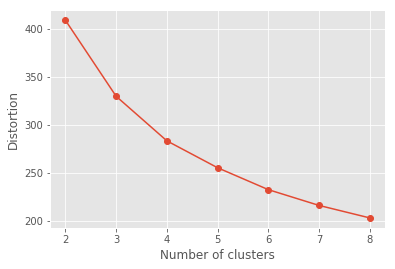

'Elbow method shows best k at: 4'

In [ ]:
k_choices = [2, 3, 4, 5, 6, 7, 8]
distortions = []
X = dff
for k in k_choices:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    dist = kmeans.inertia_
    distortions.append(dist)
plt.plot(k_choices, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
"Elbow method shows best k at: 4"
#raise NotImplementedError()

### Question 10 `(1 points)`
**This question will be manually graded.**

For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe in short the question, and how clustering can answer that question.


In [ ]:
print('Q: From the best cluster in question 3.')
print('Are the different types of votes per review more equally distributed or skewed?')

X = df[['q11', 'q12', 'q13']].dropna()
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)
print(kmeans.cluster_centers_)



Q: From the best cluster in question 3.
Are the different types of votes per review more equally distributed or skewed?
[[ 3.22372749 52.6463163  44.13010706]
 [26.65724869  3.35930157 69.98331919]
 [ 0.30151074  0.41439068 99.28407749]
 [98.15302932  0.96006515  0.88692182]
 [14.77016061 24.31317867 60.91748606]
 [47.5718608   3.79349738 48.63460687]
 [ 1.13148897 98.30148897  0.56707721]
 [33.32892731 32.86593978 33.80160198]]


We can use clustering to help determine this because we can observe the cluster centers and determine where they are positioned. If the centers are near 33.3, that means they are equally distributed. However, if there is alot of variance, then it is not. From looking at the cluster centers, we can see that the majority of the clusters are not equally voted in all 3 categories. Most of them are learning towards one type of vote or occassionally 2.

## Bonus question (`2 Points`) - Reviewer overlap:
- Aggregate cool, funny and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed. (You may need to use the pivot function) 

In [ ]:
#DOWNLOADING DATASET IF NOT PRESENT
!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv

#!unzip yelp_reviews.zip
print('Dataset Downloaded: yelp_reviews.csv')
df=pd.read_csv('yelp_reviews.csv')
print(df.head())

print('Setup Complete')

File ‘yelp_reviews.csv’ already there; not retrieving.

Dataset Downloaded: yelp_reviews.csv
     type             business_id  ... useful_votes  funny_votes
0  review  mxrXVZWc6PWk81gvOVNOUw  ...            0            0
1  review  mxrXVZWc6PWk81gvOVNOUw  ...            0            0
2  review  kK4AzZ0YWI-U2G-paAL7Fg  ...            0            0
3  review  mxrXVZWc6PWk81gvOVNOUw  ...            1            0
4  review  mxrXVZWc6PWk81gvOVNOUw  ...            0            1

[5 rows x 9 columns]
Setup Complete


In [ ]:
grouped = df.groupby('business_id').sum().drop(columns = ['stars'])
grouped.sort_values(by=['cool_votes'])
grouped.head()

,cool_votes,useful_votes,funny_votes
business_id,,,
--5jkZ3-nUPZxUvtcbr8Uw,4,3,3
--AKjxBmhm9DWrh-e0hTOw,0,0,0
--BlvDO_RG2yElKu9XA1_g,1,3,1
--Ol5mVSMaW8ExtmWRUmKA,0,1,0
--Y_2lDOtVDioX5bwF6GIw,0,4,0


In [ ]:
# k_choices = [2, 3, 4, 5, 6, 7, 8]
# scores = []
# X = grouped
# for k in k_choices:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     score = silhouette_score(X, kmeans.labels_)
#     scores.append(score)
# print(k_choices[scores.index(max(scores))])
print('above code shows that the best k is 2 so will proceed with that')

above code shows that the best k is 2 so will proceed with that


In [ ]:
X = grouped
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[   3.69910481    7.74002452    3.15854364]
 [ 618.75581395 1067.72093023  610.15116279]]


The two clusters are very far about. There are some that just a have a few votes while other business ID's have hundreds of them.

In [ ]:
grouped['clusterID'] = kmeans.labels_
tomerge = grouped.reset_index()
merged = pd.merge(tomerge, df, on='business_id')
final = merged[['business_id', 'user_id', 'cool_votes_x', 'useful_votes_x', 'funny_votes_x', 'clusterID']]
final.head()

,business_id,user_id,cool_votes_x,useful_votes_x,funny_votes_x,clusterID
0,--5jkZ3-nUPZxUvtcbr8Uw,Z3QMIh7ZYf6Q7NbvHJey4Q,4,3,3,0
1,--5jkZ3-nUPZxUvtcbr8Uw,c8ghzViTRFM44VaccEnEYw,4,3,3,0
2,--5jkZ3-nUPZxUvtcbr8Uw,5kH4RrEyebBr75ASdxnzSg,4,3,3,0
3,--5jkZ3-nUPZxUvtcbr8Uw,GRuNDtXKvJgfG69rsqpXIQ,4,3,3,0
4,--5jkZ3-nUPZxUvtcbr8Uw,tCa2ajxRYbX_RiUX0VPlfA,4,3,3,0


Each row represents a unique pair of business_id + user_id